### Vizualisation
vizualisation of the processed data

In [18]:
import pandas as pd

# import data
file_name = "processed_fr.openfoodfacts.org.products.csv"
df = pd.read_csv(file_name, header = 0, low_memory=False)

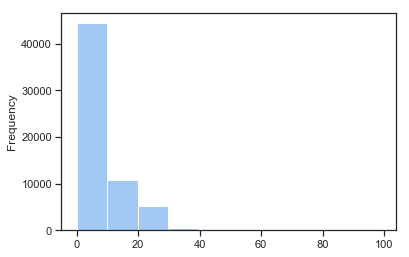

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", palette="pastel")

main "carbohydrates_100g", proteins_100g, fat_100g
df["proteins_100g"].plot.hist()

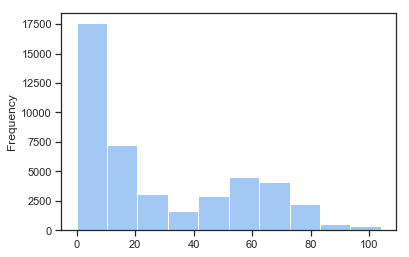

In [20]:
df["carbohydrates_100g"].plot.hist()

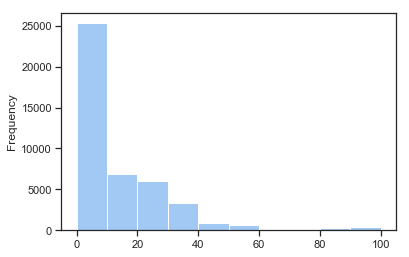

In [21]:
df["fat_100g"].plot.hist()

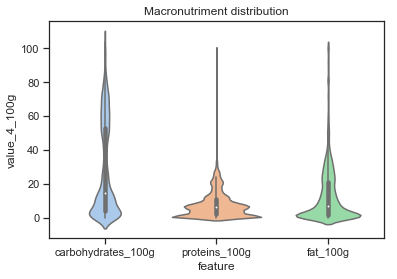

In [36]:
# melt df for boxplot
macronutriment = ["carbohydrates_100g", "proteins_100g", "fat_100g"]
df_melt = df.loc[:,macronutriment].melt(var_name= "feature", value_name="value_4_100g")

plt.title("Macronutriment distribution")
plt.ylabel("value for 100g [g]")
plt.xlabel("")
sns.violinplot(y="value_4_100g", x="feature", data=df_melt )

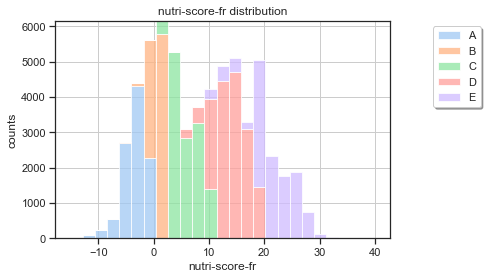

In [13]:
# score overview
group_a = df["nutrition_grade_fr"] == "a"
group_b = df["nutrition_grade_fr"] == "b"
group_c = df["nutrition_grade_fr"] == "c"
group_d = df["nutrition_grade_fr"] == "d"
group_e = df["nutrition_grade_fr"] == "e"

plt.hist(x = [df.loc[group_a,"nutrition-score-fr_100g"].dropna(),
            df.loc[group_b,"nutrition-score-fr_100g"].dropna(),
            df.loc[group_c,"nutrition-score-fr_100g"].dropna(),
            df.loc[group_d,"nutrition-score-fr_100g"].dropna(),
            df.loc[group_e,"nutrition-score-fr_100g"].dropna()] ,
         bins = 25, alpha=0.75, stacked= True, label = ("A","B","C","D","E"));

plt.xlabel('nutri-score-fr')
plt.ylabel('counts')
plt.title("nutri-score-fr distribution")
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          fancybox=True, shadow=True, ncol=1)
plt.show()